# Finally, you will be working with your own dataset!

Let's start with importing all the Python modules. You may or may not need all of them, and feel free to add extra modules you want to use in the cell below.

In [1]:
import pandas as pd
import numpy as np

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
plots.rcParams["patch.force_edgecolor"] = True

import seaborn as sns

### Special instruction for Google Colab

* Using Colab to collaberate with your teammates is an option
* Remember to sign in with your Rice email to access:
    * [Welcome to Colab](https://colab.research.google.com/notebooks/intro.ipynb?authuser=1#)
* On top left click File, you have the following options:
    * New notebook: to start a blank notebook
    * Open notebook: to open a notebook already saved in your Google drive
    * Upload notebook: to upload a notebook in your local drive (here you can upload your lab05.ipynb file)

* Once you have a notebook open in Colab, everything works pretty much the same!
* You can easily share the notebook to your teammates, just like sharing a Google doc.

## Read in the data

Make sure your data file is saved in the same folder as this notebook, otherwise you will need to specify the file path to locate your data file. 

Throughout the notebook, I will link some Python documentations for useful functions and methods for easy access. 

Only perform the steps you see necessary. Feel free to add cells whenever you see fit.

* [pd.read_csv and others](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)

In [2]:
mask_use_by_county = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/mask-use/mask-use-by-county.csv', error_bad_lines=False)
mask_use_by_county

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
0,1001,0.053,0.074,0.134,0.295,0.444
1,1003,0.083,0.059,0.098,0.323,0.436
2,1005,0.067,0.121,0.120,0.201,0.491
3,1007,0.020,0.034,0.096,0.278,0.572
4,1009,0.053,0.114,0.180,0.194,0.459
...,...,...,...,...,...,...
3137,56037,0.061,0.295,0.230,0.146,0.268
3138,56039,0.095,0.157,0.160,0.247,0.340
3139,56041,0.098,0.278,0.154,0.207,0.264
3140,56043,0.204,0.155,0.069,0.285,0.287


In [3]:
us_counties = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv')
us_counties

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0
...,...,...,...,...,...,...
657653,2020-10-22,Sweetwater,Wyoming,56037.0,443,2
657654,2020-10-22,Teton,Wyoming,56039.0,727,1
657655,2020-10-22,Uinta,Wyoming,56041.0,410,3
657656,2020-10-22,Washakie,Wyoming,56043.0,142,7


In [4]:
voting_results = pd.read_csv('https://raw.githubusercontent.com/tonmcg/US_County_Level_Election_Results_08-16/master/US_County_Level_Presidential_Results_08-16.csv')
voting_results

,fips_code,county,total_2008,dem_2008,gop_2008,oth_2008,total_2012,dem_2012,gop_2012,oth_2012,total_2016,dem_2016,gop_2016,oth_2016
0,26041,Delta County,19064,9974,8763,327,18043,8330,9533,180,18467,6431,11112,924
1,48295,Lipscomb County,1256,155,1093,8,1168,119,1044,5,1322,135,1159,28
2,1127,Walker County,28652,7420,20722,510,28497,6551,21633,313,29243,4486,24208,549
3,48389,Reeves County,3077,1606,1445,26,2867,1649,1185,33,3184,1659,1417,108
4,56017,Hot Springs County,2546,619,1834,93,2495,523,1894,78,2535,400,1939,196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3107,17115,Macon County,51216,25487,24948,781,48742,22688,25249,805,47283,18211,26782,2290
3108,29215,Texas County,10851,3410,7215,226,10764,2871,7618,275,10935,1728,8875,332
3109,46051,Grant County,3830,1786,1951,93,3606,1493,2034,79,3562,970,2381,211
3110,17103,Lee County,16318,7765,8258,295,15275,6932,8046,297,15215,5499,8597,1119


In [5]:
demographics = pd.read_csv('county_2019_by_ch.csv')
demographics

,Unnamed: 0,STATE,COUNTY,STNAME,CTYNAME,TOT_POP,PERC_MALE,PERC_SENIOR_MALE,PERC_SENIOR_FEMALE,PERC_WHITE_MALE,PERC_WHITE_FEMALE,PERC_BLACK_MALE,PERC_BLACK_FEMALE,PERC_ASIAN_MALE,PERC_ASIAN_FEMALE,PERC_HISPANIC_MALE,PERC_HISPANIC_FEMALE,PERC_OTHER_MALE,PERC_OTHER_FEMALE,FIPS
0,0,1,1,Alabama,Autauga County,55869,0.484920,0.070039,0.089692,0.373696,0.388928,0.093737,0.107394,0.093737,0.107394,0.015823,0.014087,0.012368,0.012136,1001
1,1,1,3,Alabama,Baldwin County,223234,0.484904,0.097328,0.112452,0.424711,0.449699,0.042494,0.045275,0.042494,0.045275,0.024839,0.022349,0.013524,0.013636,1003
2,2,1,5,Alabama,Barbour County,24686,0.529207,0.084947,0.111966,0.258811,0.232723,0.255651,0.226647,0.255651,0.226647,0.025480,0.019768,0.012517,0.008952,1005
3,3,1,7,Alabama,Bibb County,22394,0.532687,0.074440,0.092257,0.391444,0.376217,0.131330,0.081361,0.131330,0.081361,0.015317,0.012503,0.008886,0.008618,1007
4,4,1,9,Alabama,Blount County,57826,0.492374,0.084789,0.102220,0.471380,0.486874,0.008923,0.007989,0.008923,0.007989,0.051015,0.045516,0.010601,0.011033,1009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,3137,56,37,Wyoming,Sweetwater County,42343,0.515032,0.063245,0.066386,0.482866,0.454668,0.008195,0.005928,0.008195,0.005928,0.083863,0.076069,0.019177,0.018468,56037
3138,3138,56,39,Wyoming,Teton County,23464,0.517474,0.080378,0.078034,0.492968,0.456785,0.004304,0.003026,0.004304,0.003026,0.080293,0.071173,0.014107,0.011976,56039
3139,3139,56,41,Wyoming,Uinta County,20226,0.505488,0.075002,0.074558,0.482201,0.470879,0.003807,0.003708,0.003807,0.003708,0.045832,0.046673,0.017601,0.016859,56041
3140,3140,56,43,Wyoming,Washakie County,7805,0.507751,0.107751,0.113901,0.481614,0.463549,0.003203,0.002434,0.003203,0.002434,0.072389,0.069571,0.019731,0.021268,56043


In [6]:
annual_aqi_by_county = pd.read_csv('annual_aqi_by_county_2020.csv')
annual_aqi_by_county

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10
0,Alabama,Baldwin,2020,11,11,0,0,0,0,0,48,39,20,0,0,0,0,11,0
1,Alabama,Clay,2020,5,5,0,0,0,0,0,31,31,15,0,0,0,0,5,0
2,Alabama,DeKalb,2020,59,59,0,0,0,0,0,45,40,32,0,0,58,0,1,0
3,Alabama,Etowah,2020,8,8,0,0,0,0,0,40,40,28,0,0,0,0,8,0
4,Alabama,Jefferson,2020,32,26,6,0,0,0,0,63,54,35,1,5,9,0,15,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622,Wyoming,Lincoln,2020,91,91,0,0,0,0,0,29,19,6,0,0,0,0,0,91
623,Wyoming,Sublette,2020,59,58,1,0,0,0,0,51,47,43,0,0,59,0,0,0
624,Wyoming,Sweetwater,2020,91,91,0,0,0,0,0,43,10,6,0,0,0,0,0,91
625,Wyoming,Teton,2020,60,59,1,0,0,0,0,54,44,41,0,0,60,0,0,0


In [7]:
annual_aqi_by_county_median = annual_aqi_by_county[['State', 'County', 'Median AQI']]
annual_aqi_by_county_median

,State,County,Median AQI
0,Alabama,Baldwin,20
1,Alabama,Clay,15
2,Alabama,DeKalb,32
3,Alabama,Etowah,28
4,Alabama,Jefferson,35
...,...,...,...
622,Wyoming,Lincoln,6
623,Wyoming,Sublette,43
624,Wyoming,Sweetwater,6
625,Wyoming,Teton,41


### Read in data using Google Colab
First, save your csv files to your own google drive:
* on the left side bar of your notebook, click the icon of folder to access your Google drive.
* click your folder "content / drive / My Drive", you should see the csv files you have uploaded.
* run the following cell to allow your notebook access to your Google drive folder. The cell will return some instruction: you need to go to the link to retrieve the authorization code and copy and paste into the blank. Then you are good to go!

In [8]:
#from google.colab import drive
#drive.mount('/content/drive')

Now that you have set up your access:
* go to your folder on the left again and find your csv file you want to read in
* right click that file and click "Copy path"
* paste the path below to read in the csv file, your pasted file should look like
    * "/content/drive/My Drive/your_csv_file.csv"

In [9]:
#your_df_name = pd.read_csv('paste_the_path_here')

## Select the columns you want to work with

In [10]:
july31 = us_counties[us_counties['date'] == '2020-07-31']
july31

,date,county,state,fips,cases,deaths
385994,2020-07-31,Autauga,Alabama,1001.0,1015,21
385995,2020-07-31,Baldwin,Alabama,1003.0,3101,22
385996,2020-07-31,Barbour,Alabama,1005.0,598,5
385997,2020-07-31,Bibb,Alabama,1007.0,363,2
385998,2020-07-31,Blount,Alabama,1009.0,767,3
...,...,...,...,...,...,...
389206,2020-07-31,Sweetwater,Wyoming,56037.0,240,2
389207,2020-07-31,Teton,Wyoming,56039.0,335,1
389208,2020-07-31,Uinta,Wyoming,56041.0,254,1
389209,2020-07-31,Washakie,Wyoming,56043.0,47,5


In [11]:
july31.dropna(axis=0)

,date,county,state,fips,cases,deaths
385994,2020-07-31,Autauga,Alabama,1001.0,1015,21
385995,2020-07-31,Baldwin,Alabama,1003.0,3101,22
385996,2020-07-31,Barbour,Alabama,1005.0,598,5
385997,2020-07-31,Bibb,Alabama,1007.0,363,2
385998,2020-07-31,Blount,Alabama,1009.0,767,3
...,...,...,...,...,...,...
389206,2020-07-31,Sweetwater,Wyoming,56037.0,240,2
389207,2020-07-31,Teton,Wyoming,56039.0,335,1
389208,2020-07-31,Uinta,Wyoming,56041.0,254,1
389209,2020-07-31,Washakie,Wyoming,56043.0,47,5


In [12]:
new = july31.merge(mask_use_by_county, how='inner', left_on='fips', right_on='COUNTYFP')
new

,date,county,state,fips,cases,deaths,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
0,2020-07-31,Autauga,Alabama,1001.0,1015,21,1001,0.053,0.074,0.134,0.295,0.444
1,2020-07-31,Baldwin,Alabama,1003.0,3101,22,1003,0.083,0.059,0.098,0.323,0.436
2,2020-07-31,Barbour,Alabama,1005.0,598,5,1005,0.067,0.121,0.120,0.201,0.491
3,2020-07-31,Bibb,Alabama,1007.0,363,2,1007,0.020,0.034,0.096,0.278,0.572
4,2020-07-31,Blount,Alabama,1009.0,767,3,1009,0.053,0.114,0.180,0.194,0.459
...,...,...,...,...,...,...,...,...,...,...,...,...
3100,2020-07-31,Sweetwater,Wyoming,56037.0,240,2,56037,0.061,0.295,0.230,0.146,0.268
3101,2020-07-31,Teton,Wyoming,56039.0,335,1,56039,0.095,0.157,0.160,0.247,0.340
3102,2020-07-31,Uinta,Wyoming,56041.0,254,1,56041,0.098,0.278,0.154,0.207,0.264
3103,2020-07-31,Washakie,Wyoming,56043.0,47,5,56043,0.204,0.155,0.069,0.285,0.287


In [13]:
new_no_date = new.drop(columns=['date'])
new_no_date

,county,state,fips,cases,deaths,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
0,Autauga,Alabama,1001.0,1015,21,1001,0.053,0.074,0.134,0.295,0.444
1,Baldwin,Alabama,1003.0,3101,22,1003,0.083,0.059,0.098,0.323,0.436
2,Barbour,Alabama,1005.0,598,5,1005,0.067,0.121,0.120,0.201,0.491
3,Bibb,Alabama,1007.0,363,2,1007,0.020,0.034,0.096,0.278,0.572
4,Blount,Alabama,1009.0,767,3,1009,0.053,0.114,0.180,0.194,0.459
...,...,...,...,...,...,...,...,...,...,...,...
3100,Sweetwater,Wyoming,56037.0,240,2,56037,0.061,0.295,0.230,0.146,0.268
3101,Teton,Wyoming,56039.0,335,1,56039,0.095,0.157,0.160,0.247,0.340
3102,Uinta,Wyoming,56041.0,254,1,56041,0.098,0.278,0.154,0.207,0.264
3103,Washakie,Wyoming,56043.0,47,5,56043,0.204,0.155,0.069,0.285,0.287


In [14]:
voting_results_2016 = voting_results.drop(columns=['total_2008', 'dem_2008', 'gop_2008', 'oth_2008', 'total_2012', 'dem_2012', 'gop_2012', 'oth_2012'])
voting_results_2016

,fips_code,county,total_2016,dem_2016,gop_2016,oth_2016
0,26041,Delta County,18467,6431,11112,924
1,48295,Lipscomb County,1322,135,1159,28
2,1127,Walker County,29243,4486,24208,549
3,48389,Reeves County,3184,1659,1417,108
4,56017,Hot Springs County,2535,400,1939,196
...,...,...,...,...,...,...
3107,17115,Macon County,47283,18211,26782,2290
3108,29215,Texas County,10935,1728,8875,332
3109,46051,Grant County,3562,970,2381,211
3110,17103,Lee County,15215,5499,8597,1119


In [40]:
percent_dem = (voting_results_2016['dem_2016']/voting_results_2016['total_2016'])*100
voting_results_2016['percent_dem'] = percent_dem
voting_results_2016

,fips_code,county,total_2016,dem_2016,gop_2016,oth_2016,percent_dem,determine_dem,dem or gop
0,26041,Delta County,18467,6431,11112,924,34.824281,-4681,republican
1,48295,Lipscomb County,1322,135,1159,28,10.211800,-1024,republican
2,1127,Walker County,29243,4486,24208,549,15.340423,-19722,republican
3,48389,Reeves County,3184,1659,1417,108,52.104271,242,democrat
4,56017,Hot Springs County,2535,400,1939,196,15.779093,-1539,republican
...,...,...,...,...,...,...,...,...,...
3107,17115,Macon County,47283,18211,26782,2290,38.514900,-8571,republican
3108,29215,Texas County,10935,1728,8875,332,15.802469,-7147,republican
3109,46051,Grant County,3562,970,2381,211,27.231892,-1411,republican
3110,17103,Lee County,15215,5499,8597,1119,36.141965,-3098,republican


In [16]:
determine_dem = voting_results_2016['dem_2016'] - voting_results_2016['gop_2016']
voting_results_2016['determine_dem'] = determine_dem
def dem_or_gop(determine_dem): 
    if determine_dem > 0:
        return 'democrat'
    else:
        return 'republican'
voting_results_2016['dem or gop'] = voting_results_2016['determine_dem'].apply(dem_or_gop)
voting_results_2016

,fips_code,county,total_2016,dem_2016,gop_2016,oth_2016,percent_dem,determine_dem,dem or gop
0,26041,Delta County,18467,6431,11112,924,34.824281,-4681,republican
1,48295,Lipscomb County,1322,135,1159,28,10.211800,-1024,republican
2,1127,Walker County,29243,4486,24208,549,15.340423,-19722,republican
3,48389,Reeves County,3184,1659,1417,108,52.104271,242,democrat
4,56017,Hot Springs County,2535,400,1939,196,15.779093,-1539,republican
...,...,...,...,...,...,...,...,...,...
3107,17115,Macon County,47283,18211,26782,2290,38.514900,-8571,republican
3108,29215,Texas County,10935,1728,8875,332,15.802469,-7147,republican
3109,46051,Grant County,3562,970,2381,211,27.231892,-1411,republican
3110,17103,Lee County,15215,5499,8597,1119,36.141965,-3098,republican


In [17]:
party_info = voting_results_2016.drop(columns=['total_2016', 'dem_2016', 'gop_2016', 'oth_2016', 'determine_dem'])
party_info

,fips_code,county,percent_dem,dem or gop
0,26041,Delta County,34.824281,republican
1,48295,Lipscomb County,10.211800,republican
2,1127,Walker County,15.340423,republican
3,48389,Reeves County,52.104271,democrat
4,56017,Hot Springs County,15.779093,republican
...,...,...,...,...
3107,17115,Macon County,38.514900,republican
3108,29215,Texas County,15.802469,republican
3109,46051,Grant County,27.231892,republican
3110,17103,Lee County,36.141965,republican


In [41]:
new2 = new_no_date.merge(party_info, how='inner', left_on='COUNTYFP', right_on='fips_code')
new2

,county_x,state,fips,cases,deaths,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,fips_code,county_y,percent_dem,dem or gop
0,Autauga,Alabama,1001.0,1015,21,1001,0.053,0.074,0.134,0.295,0.444,1001,Autauga County,23.956855,republican
1,Baldwin,Alabama,1003.0,3101,22,1003,0.083,0.059,0.098,0.323,0.436,1003,Baldwin County,19.565310,republican
2,Barbour,Alabama,1005.0,598,5,1005,0.067,0.121,0.120,0.201,0.491,1005,Barbour County,46.660250,republican
3,Bibb,Alabama,1007.0,363,2,1007,0.020,0.034,0.096,0.278,0.572,1007,Bibb County,21.422039,republican
4,Blount,Alabama,1009.0,767,3,1009,0.053,0.114,0.180,0.194,0.459,1009,Blount County,8.469902,republican
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3073,Sweetwater,Wyoming,56037.0,240,2,56037,0.061,0.295,0.230,0.146,0.268,56037,Sweetwater County,19.404598,republican
3074,Teton,Wyoming,56039.0,335,1,56039,0.095,0.157,0.160,0.247,0.340,56039,Teton County,60.060775,democrat
3075,Uinta,Wyoming,56041.0,254,1,56041,0.098,0.278,0.154,0.207,0.264,56041,Uinta County,14.926114,republican
3076,Washakie,Wyoming,56043.0,47,5,56043,0.204,0.155,0.069,0.285,0.287,56043,Washakie County,14.320323,republican


In [19]:
new3 = new2.merge(demographics, how='inner', left_on='fips_code', right_on='FIPS')
pd.set_option('display.max_columns', None)
new3

,county_x,state,fips,cases,deaths,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,fips_code,county_y,percent_dem,dem or gop,Unnamed: 0,STATE,COUNTY,STNAME,CTYNAME,TOT_POP,PERC_MALE,PERC_SENIOR_MALE,PERC_SENIOR_FEMALE,PERC_WHITE_MALE,PERC_WHITE_FEMALE,PERC_BLACK_MALE,PERC_BLACK_FEMALE,PERC_ASIAN_MALE,PERC_ASIAN_FEMALE,PERC_HISPANIC_MALE,PERC_HISPANIC_FEMALE,PERC_OTHER_MALE,PERC_OTHER_FEMALE,FIPS
0,Autauga,Alabama,1001.0,1015,21,1001,0.053,0.074,0.134,0.295,0.444,1001,Autauga County,23.956855,republican,0,1,1,Alabama,Autauga County,55869,0.484920,0.070039,0.089692,0.373696,0.388928,0.093737,0.107394,0.093737,0.107394,0.015823,0.014087,0.012368,0.012136,1001
1,Baldwin,Alabama,1003.0,3101,22,1003,0.083,0.059,0.098,0.323,0.436,1003,Baldwin County,19.565310,republican,1,1,3,Alabama,Baldwin County,223234,0.484904,0.097328,0.112452,0.424711,0.449699,0.042494,0.045275,0.042494,0.045275,0.024839,0.022349,0.013524,0.013636,1003
2,Barbour,Alabama,1005.0,598,5,1005,0.067,0.121,0.120,0.201,0.491,1005,Barbour County,46.660250,republican,2,1,5,Alabama,Barbour County,24686,0.529207,0.084947,0.111966,0.258811,0.232723,0.255651,0.226647,0.255651,0.226647,0.025480,0.019768,0.012517,0.008952,1005
3,Bibb,Alabama,1007.0,363,2,1007,0.020,0.034,0.096,0.278,0.572,1007,Bibb County,21.422039,republican,3,1,7,Alabama,Bibb County,22394,0.532687,0.074440,0.092257,0.391444,0.376217,0.131330,0.081361,0.131330,0.081361,0.015317,0.012503,0.008886,0.008618,1007
4,Blount,Alabama,1009.0,767,3,1009,0.053,0.114,0.180,0.194,0.459,1009,Blount County,8.469902,republican,4,1,9,Alabama,Blount County,57826,0.492374,0.084789,0.102220,0.471380,0.486874,0.008923,0.007989,0.008923,0.007989,0.051015,0.045516,0.010601,0.011033,1009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3073,Sweetwater,Wyoming,56037.0,240,2,56037,0.061,0.295,0.230,0.146,0.268,56037,Sweetwater County,19.404598,republican,3137,56,37,Wyoming,Sweetwater County,42343,0.515032,0.063245,0.066386,0.482866,0.454668,0.008195,0.005928,0.008195,0.005928,0.083863,0.076069,0.019177,0.018468,56037
3074,Teton,Wyoming,56039.0,335,1,56039,0.095,0.157,0.160,0.247,0.340,56039,Teton County,60.060775,democrat,3138,56,39,Wyoming,Teton County,23464,0.517474,0.080378,0.078034,0.492968,0.456785,0.004304,0.003026,0.004304,0.003026,0.080293,0.071173,0.014107,0.011976,56039
3075,Uinta,Wyoming,56041.0,254,1,56041,0.098,0.278,0.154,0.207,0.264,56041,Uinta County,14.926114,republican,3139,56,41,Wyoming,Uinta County,20226,0.505488,0.075002,0.074558,0.482201,0.470879,0.003807,0.003708,0.003807,0.003708,0.045832,0.046673,0.017601,0.016859,56041
3076,Washakie,Wyoming,56043.0,47,5,56043,0.204,0.155,0.069,0.285,0.287,56043,Washakie County,14.320323,republican,3140,56,43,Wyoming,Washakie County,7805,0.507751,0.107751,0.113901,0.481614,0.463549,0.003203,0.002434,0.003203,0.002434,0.072389,0.069571,0.019731,0.021268,56043


In [20]:
new4 = new3.merge(annual_aqi_by_county_median, how='left', left_on=['county_x', 'state'], right_on=['County', 'State'])
new4['Median AQI'] = new4['Median AQI'].fillna('unknown')
new4

,county_x,state,fips,cases,deaths,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,fips_code,county_y,percent_dem,dem or gop,Unnamed: 0,STATE,COUNTY,STNAME,CTYNAME,TOT_POP,PERC_MALE,PERC_SENIOR_MALE,PERC_SENIOR_FEMALE,PERC_WHITE_MALE,PERC_WHITE_FEMALE,PERC_BLACK_MALE,PERC_BLACK_FEMALE,PERC_ASIAN_MALE,PERC_ASIAN_FEMALE,PERC_HISPANIC_MALE,PERC_HISPANIC_FEMALE,PERC_OTHER_MALE,PERC_OTHER_FEMALE,FIPS,State,County,Median AQI
0,Autauga,Alabama,1001.0,1015,21,1001,0.053,0.074,0.134,0.295,0.444,1001,Autauga County,23.956855,republican,0,1,1,Alabama,Autauga County,55869,0.484920,0.070039,0.089692,0.373696,0.388928,0.093737,0.107394,0.093737,0.107394,0.015823,0.014087,0.012368,0.012136,1001,NaN,NaN,unknown
1,Baldwin,Alabama,1003.0,3101,22,1003,0.083,0.059,0.098,0.323,0.436,1003,Baldwin County,19.565310,republican,1,1,3,Alabama,Baldwin County,223234,0.484904,0.097328,0.112452,0.424711,0.449699,0.042494,0.045275,0.042494,0.045275,0.024839,0.022349,0.013524,0.013636,1003,Alabama,Baldwin,20
2,Barbour,Alabama,1005.0,598,5,1005,0.067,0.121,0.120,0.201,0.491,1005,Barbour County,46.660250,republican,2,1,5,Alabama,Barbour County,24686,0.529207,0.084947,0.111966,0.258811,0.232723,0.255651,0.226647,0.255651,0.226647,0.025480,0.019768,0.012517,0.008952,1005,NaN,NaN,unknown
3,Bibb,Alabama,1007.0,363,2,1007,0.020,0.034,0.096,0.278,0.572,1007,Bibb County,21.422039,republican,3,1,7,Alabama,Bibb County,22394,0.532687,0.074440,0.092257,0.391444,0.376217,0.131330,0.081361,0.131330,0.081361,0.015317,0.012503,0.008886,0.008618,1007,NaN,NaN,unknown
4,Blount,Alabama,1009.0,767,3,1009,0.053,0.114,0.180,0.194,0.459,1009,Blount County,8.469902,republican,4,1,9,Alabama,Blount County,57826,0.492374,0.084789,0.102220,0.471380,0.486874,0.008923,0.007989,0.008923,0.007989,0.051015,0.045516,0.010601,0.011033,1009,NaN,NaN,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3073,Sweetwater,Wyoming,56037.0,240,2,56037,0.061,0.295,0.230,0.146,0.268,56037,Sweetwater County,19.404598,republican,3137,56,37,Wyoming,Sweetwater County,42343,0.515032,0.063245,0.066386,0.482866,0.454668,0.008195,0.005928,0.008195,0.005928,0.083863,0.076069,0.019177,0.018468,56037,Wyoming,Sweetwater,6
3074,Teton,Wyoming,56039.0,335,1,56039,0.095,0.157,0.160,0.247,0.340,56039,Teton County,60.060775,democrat,3138,56,39,Wyoming,Teton County,23464,0.517474,0.080378,0.078034,0.492968,0.456785,0.004304,0.003026,0.004304,0.003026,0.080293,0.071173,0.014107,0.011976,56039,Wyoming,Teton,41
3075,Uinta,Wyoming,56041.0,254,1,56041,0.098,0.278,0.154,0.207,0.264,56041,Uinta County,14.926114,republican,3139,56,41,Wyoming,Uinta County,20226,0.505488,0.075002,0.074558,0.482201,0.470879,0.003807,0.003708,0.003807,0.003708,0.045832,0.046673,0.017601,0.016859,56041,Wyoming,Uinta,5
3076,Washakie,Wyoming,56043.0,47,5,56043,0.204,0.155,0.069,0.285,0.287,56043,Washakie County,14.320323,republican,3140,56,43,Wyoming,Washakie County,7805,0.507751,0.107751,0.113901,0.481614,0.463549,0.003203,0.002434,0.003203,0.002434,0.072389,0.069571,0.019731,0.021268,56043,NaN,NaN,unknown


In [21]:
new5 = new4.drop(columns=['COUNTYFP', 'fips_code', 'county_y', 'STATE', 'COUNTY', 'STNAME', 'CTYNAME', 'FIPS', 'State', 'County'])
new5

,county_x,state,fips,cases,deaths,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,percent_dem,dem or gop,Unnamed: 0,TOT_POP,PERC_MALE,PERC_SENIOR_MALE,PERC_SENIOR_FEMALE,PERC_WHITE_MALE,PERC_WHITE_FEMALE,PERC_BLACK_MALE,PERC_BLACK_FEMALE,PERC_ASIAN_MALE,PERC_ASIAN_FEMALE,PERC_HISPANIC_MALE,PERC_HISPANIC_FEMALE,PERC_OTHER_MALE,PERC_OTHER_FEMALE,Median AQI
0,Autauga,Alabama,1001.0,1015,21,0.053,0.074,0.134,0.295,0.444,23.956855,republican,0,55869,0.484920,0.070039,0.089692,0.373696,0.388928,0.093737,0.107394,0.093737,0.107394,0.015823,0.014087,0.012368,0.012136,unknown
1,Baldwin,Alabama,1003.0,3101,22,0.083,0.059,0.098,0.323,0.436,19.565310,republican,1,223234,0.484904,0.097328,0.112452,0.424711,0.449699,0.042494,0.045275,0.042494,0.045275,0.024839,0.022349,0.013524,0.013636,20
2,Barbour,Alabama,1005.0,598,5,0.067,0.121,0.120,0.201,0.491,46.660250,republican,2,24686,0.529207,0.084947,0.111966,0.258811,0.232723,0.255651,0.226647,0.255651,0.226647,0.025480,0.019768,0.012517,0.008952,unknown
3,Bibb,Alabama,1007.0,363,2,0.020,0.034,0.096,0.278,0.572,21.422039,republican,3,22394,0.532687,0.074440,0.092257,0.391444,0.376217,0.131330,0.081361,0.131330,0.081361,0.015317,0.012503,0.008886,0.008618,unknown
4,Blount,Alabama,1009.0,767,3,0.053,0.114,0.180,0.194,0.459,8.469902,republican,4,57826,0.492374,0.084789,0.102220,0.471380,0.486874,0.008923,0.007989,0.008923,0.007989,0.051015,0.045516,0.010601,0.011033,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3073,Sweetwater,Wyoming,56037.0,240,2,0.061,0.295,0.230,0.146,0.268,19.404598,republican,3137,42343,0.515032,0.063245,0.066386,0.482866,0.454668,0.008195,0.005928,0.008195,0.005928,0.083863,0.076069,0.019177,0.018468,6
3074,Teton,Wyoming,56039.0,335,1,0.095,0.157,0.160,0.247,0.340,60.060775,democrat,3138,23464,0.517474,0.080378,0.078034,0.492968,0.456785,0.004304,0.003026,0.004304,0.003026,0.080293,0.071173,0.014107,0.011976,41
3075,Uinta,Wyoming,56041.0,254,1,0.098,0.278,0.154,0.207,0.264,14.926114,republican,3139,20226,0.505488,0.075002,0.074558,0.482201,0.470879,0.003807,0.003708,0.003807,0.003708,0.045832,0.046673,0.017601,0.016859,5
3076,Washakie,Wyoming,56043.0,47,5,0.204,0.155,0.069,0.285,0.287,14.320323,republican,3140,7805,0.507751,0.107751,0.113901,0.481614,0.463549,0.003203,0.002434,0.003203,0.002434,0.072389,0.069571,0.019731,0.021268,unknown


## Rename some columns if needed
* [df.rename](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html)

In [22]:
final = new5.rename(columns={'county_x':'county'})
final

,county,state,fips,cases,deaths,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,percent_dem,dem or gop,Unnamed: 0,TOT_POP,PERC_MALE,PERC_SENIOR_MALE,PERC_SENIOR_FEMALE,PERC_WHITE_MALE,PERC_WHITE_FEMALE,PERC_BLACK_MALE,PERC_BLACK_FEMALE,PERC_ASIAN_MALE,PERC_ASIAN_FEMALE,PERC_HISPANIC_MALE,PERC_HISPANIC_FEMALE,PERC_OTHER_MALE,PERC_OTHER_FEMALE,Median AQI
0,Autauga,Alabama,1001.0,1015,21,0.053,0.074,0.134,0.295,0.444,23.956855,republican,0,55869,0.484920,0.070039,0.089692,0.373696,0.388928,0.093737,0.107394,0.093737,0.107394,0.015823,0.014087,0.012368,0.012136,unknown
1,Baldwin,Alabama,1003.0,3101,22,0.083,0.059,0.098,0.323,0.436,19.565310,republican,1,223234,0.484904,0.097328,0.112452,0.424711,0.449699,0.042494,0.045275,0.042494,0.045275,0.024839,0.022349,0.013524,0.013636,20
2,Barbour,Alabama,1005.0,598,5,0.067,0.121,0.120,0.201,0.491,46.660250,republican,2,24686,0.529207,0.084947,0.111966,0.258811,0.232723,0.255651,0.226647,0.255651,0.226647,0.025480,0.019768,0.012517,0.008952,unknown
3,Bibb,Alabama,1007.0,363,2,0.020,0.034,0.096,0.278,0.572,21.422039,republican,3,22394,0.532687,0.074440,0.092257,0.391444,0.376217,0.131330,0.081361,0.131330,0.081361,0.015317,0.012503,0.008886,0.008618,unknown
4,Blount,Alabama,1009.0,767,3,0.053,0.114,0.180,0.194,0.459,8.469902,republican,4,57826,0.492374,0.084789,0.102220,0.471380,0.486874,0.008923,0.007989,0.008923,0.007989,0.051015,0.045516,0.010601,0.011033,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3073,Sweetwater,Wyoming,56037.0,240,2,0.061,0.295,0.230,0.146,0.268,19.404598,republican,3137,42343,0.515032,0.063245,0.066386,0.482866,0.454668,0.008195,0.005928,0.008195,0.005928,0.083863,0.076069,0.019177,0.018468,6
3074,Teton,Wyoming,56039.0,335,1,0.095,0.157,0.160,0.247,0.340,60.060775,democrat,3138,23464,0.517474,0.080378,0.078034,0.492968,0.456785,0.004304,0.003026,0.004304,0.003026,0.080293,0.071173,0.014107,0.011976,41
3075,Uinta,Wyoming,56041.0,254,1,0.098,0.278,0.154,0.207,0.264,14.926114,republican,3139,20226,0.505488,0.075002,0.074558,0.482201,0.470879,0.003807,0.003708,0.003807,0.003708,0.045832,0.046673,0.017601,0.016859,5
3076,Washakie,Wyoming,56043.0,47,5,0.204,0.155,0.069,0.285,0.287,14.320323,republican,3140,7805,0.507751,0.107751,0.113901,0.481614,0.463549,0.003203,0.002434,0.003203,0.002434,0.072389,0.069571,0.019731,0.021268,unknown


In [23]:
covid_and_aqi = july31.merge(annual_aqi_by_county_median, how='inner', left_on=['county', 'state'], right_on=['County', 'State'])
covid_and_aqi

,date,county,state,fips,cases,deaths,State,County,Median AQI
0,2020-07-31,Baldwin,Alabama,1003.0,3101,22,Alabama,Baldwin,20
1,2020-07-31,Clay,Alabama,1027.0,198,5,Alabama,Clay,15
2,2020-07-31,DeKalb,Alabama,1049.0,1661,12,Alabama,DeKalb,32
3,2020-07-31,Etowah,Alabama,1055.0,1908,19,Alabama,Etowah,28
4,2020-07-31,Jefferson,Alabama,1073.0,11382,225,Alabama,Jefferson,35
...,...,...,...,...,...,...,...,...,...
595,2020-07-31,Lincoln,Wyoming,56023.0,89,0,Wyoming,Lincoln,6
596,2020-07-31,Sublette,Wyoming,56035.0,34,0,Wyoming,Sublette,43
597,2020-07-31,Sweetwater,Wyoming,56037.0,240,2,Wyoming,Sweetwater,6
598,2020-07-31,Teton,Wyoming,56039.0,335,1,Wyoming,Teton,41


In [24]:
covid_and_aqi_final = covid_and_aqi.drop(columns=['date', 'State', 'County'])
covid_and_aqi_final

,county,state,fips,cases,deaths,Median AQI
0,Baldwin,Alabama,1003.0,3101,22,20
1,Clay,Alabama,1027.0,198,5,15
2,DeKalb,Alabama,1049.0,1661,12,32
3,Etowah,Alabama,1055.0,1908,19,28
4,Jefferson,Alabama,1073.0,11382,225,35
...,...,...,...,...,...,...
595,Lincoln,Wyoming,56023.0,89,0,6
596,Sublette,Wyoming,56035.0,34,0,43
597,Sweetwater,Wyoming,56037.0,240,2,6
598,Teton,Wyoming,56039.0,335,1,41


In [25]:
seniors = final[['county', 'state', 'fips', 'cases', 'deaths', 'PERC_SENIOR_MALE', 'PERC_SENIOR_FEMALE']]
seniors['PERC_SENIOR'] = seniors['PERC_SENIOR_MALE'] + seniors['PERC_SENIOR_FEMALE']
seniors

C:\Users\RU\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,county,state,fips,cases,deaths,PERC_SENIOR_MALE,PERC_SENIOR_FEMALE,PERC_SENIOR
0,Autauga,Alabama,1001.0,1015,21,0.070039,0.089692,0.159731
1,Baldwin,Alabama,1003.0,3101,22,0.097328,0.112452,0.209780
2,Barbour,Alabama,1005.0,598,5,0.084947,0.111966,0.196913
3,Bibb,Alabama,1007.0,363,2,0.074440,0.092257,0.166696
4,Blount,Alabama,1009.0,767,3,0.084789,0.102220,0.187009
...,...,...,...,...,...,...,...,...
3073,Sweetwater,Wyoming,56037.0,240,2,0.063245,0.066386,0.129632
3074,Teton,Wyoming,56039.0,335,1,0.080378,0.078034,0.158413
3075,Uinta,Wyoming,56041.0,254,1,0.075002,0.074558,0.149560
3076,Washakie,Wyoming,56043.0,47,5,0.107751,0.113901,0.221653


## If you have multiple datasets, repeat the above steps

In [26]:
...

Ellipsis

## Merge your dataset to make one tabular dataset to work with

What columns in each dataset will allow you to merge them?

Which type of merge: inner, outer, left or right?

Do you have to merge more than once?

* [df.merge](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html)

In [27]:
...

Ellipsis

## Additional format of data

Is your data a standard format of tabular data now? Meaning each row is an observation, and each column is a feature/variable. If not, you may want to do some formatting!

Possible useful methods:
* [df.pivot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html)
* [df.pivot_table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot_table.html#pandas.DataFrame.pivot_table)
* [df.stack](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.stack.html#pandas.DataFrame.stack)
* [df.transpose](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.transpose.html)
* [df.append](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.append.html)

## Clean up your data

Is there any missing values? How would you handle them? Make sure you document what you did!

Is there any variable type and data type mismatch? Numbers saved as strings etc. 

Is there any abnormal values for any of the variables? You will need to further explore your data to discover!

* [df.fillna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)
* [df.astype](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html)

## Exploratory Data Analysis

Follow the example of the EDA demo we did in class, explore your data to understand it better. Keep in mind your data questions when you explore! Make sure you look at distributions of some important variables/features, and create some plots for data visualization.
* [series.value_counts](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html)
* [df.groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)
* [df.pivot_table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html)
* [df.plot](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html)
* ...

In [28]:
final['deaths'].value_counts()

0       830
1       399
2       234
3       174
4       122
       ... 
61        1
2102      1
2054      1
2044      1
1412      1
Name: deaths, Length: 264, dtype: int64

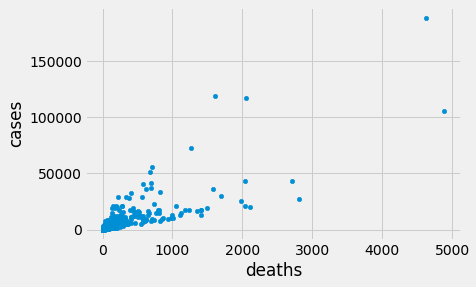

In [29]:
final.plot(kind='scatter', x='deaths', y='cases')

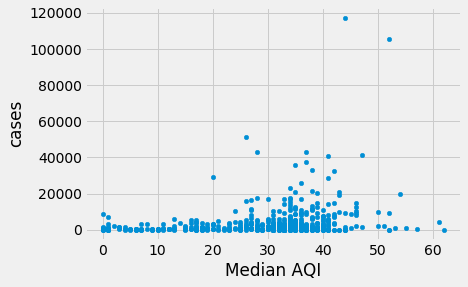

In [30]:
covid_and_aqi_final.plot(kind='scatter', x='Median AQI', y='cases')

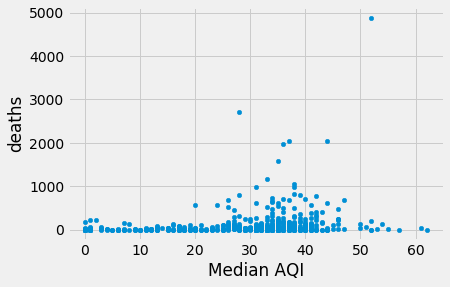

In [31]:
covid_and_aqi_final.plot(kind='scatter', x='Median AQI', y='deaths')

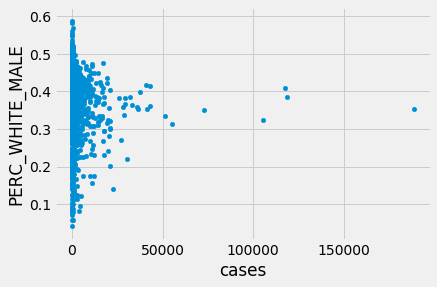

In [32]:
final.plot(kind='scatter', x='cases', y='PERC_WHITE_MALE')

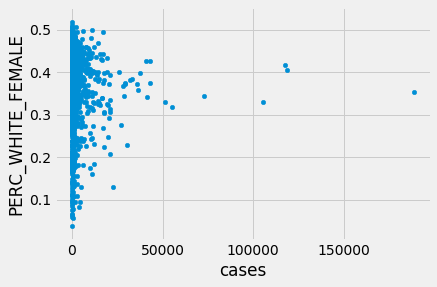

In [33]:
final.plot(kind='scatter', x='cases', y='PERC_WHITE_FEMALE')

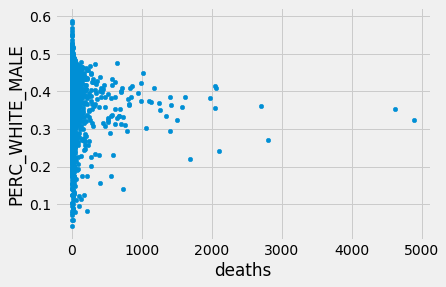

In [34]:
final.plot(kind='scatter', x='deaths', y='PERC_WHITE_MALE')

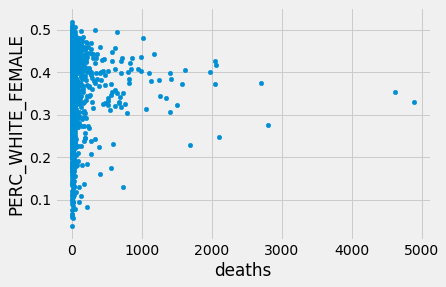

In [35]:
final.plot(kind='scatter', x='deaths', y='PERC_WHITE_FEMALE')

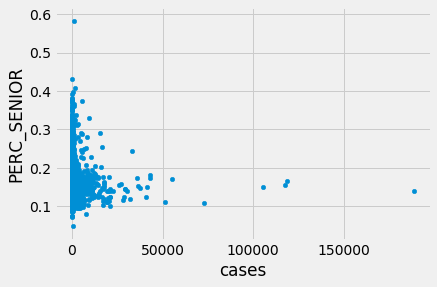

In [36]:
seniors.plot(kind='scatter', x='cases', y='PERC_SENIOR')

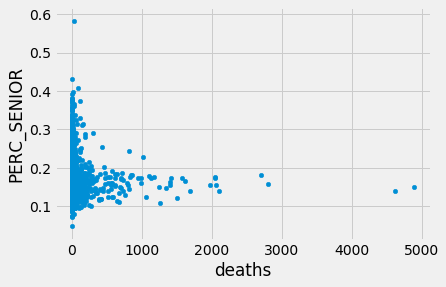

In [37]:
seniors.plot(kind='scatter', x='deaths', y='PERC_SENIOR')

Does the exploration help you understand the dataset better? Do you have any new findings and insights? Any refined questions?

## Save a version of your cleaned dataset

After all the EDA steps, save a clean version of your dataset for future analysis!
* [df.to_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html)
* I recommend to use `index=False` as an additional argument because Pandas put the default index next time you read in this csv file

In [38]:
final.to_csv('final.csv', index=False)

### Save to your Google drive if you are using Google Colab
* run the following cell and replace the correct file path and name you want to save your csv file
* double check if that file show up on the left side in the correct folder you saved

In [39]:
#df.to_csv('same_path_file_when_you_read_in_csv/name_of_your_clean_data.csv')

You're finished with lab 5! Notice this is a group assignment so you only need to submit one copy for the entire team. Be sure to...

* **Save and Checkpoint** from the File menu,
* **Close and Halt** from the File menu,
* **Rename your ipynb file** to be lab05_Team_Name,
* **Upload** your notebook and any data file(s) to the course website.